# Causes of Death Analysis

## Table of Contents

## 1. Import Visualization Libraries and Data

## 2. Data Cleaning

## 3. Explore Relationships
 Correlations
 
 Scatterplots
 
 Pair Plots
 
 Categorical Plots

## 4. Questions and Answers

## 5. Hypothesis

## 6. Export Data

## 01. Import Libraries and Data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.5.1'

In [3]:
#Ensure the created charts are displayed in the notebook without the need to "call" them specifically
%matplotlib inline

In [4]:
#Create a path
path=r'C:\Users\midov\Documents\Studies\Data Analysis\Immersion into Data Analytics\Achievement 6_Advanced Analytics & Dashboard Design\Causes of Death Analysis'

In [5]:
#Import "causes_of_deaths.csv" file as df_causes, using path variable
df_causes=pd.read_csv(os.path.join(path,'Data','Prepared Data','causes_cleaned.csv'))

In [6]:
#Import "mortality_cleaned.csv" file as df_mortality, using path variable
df_mortality=pd.read_csv(os.path.join(path,'Data','Prepared Data','mortality_cleaned.csv'))

In [7]:
#Import "gdp_cleaned.csv" file as df_gdp, using path variable
df_gdp=pd.read_csv(os.path.join(path,'Data','Prepared Data','gdp_cleaned.csv'))

## 02. Data Cleaning

In [8]:
df_causes.shape

(110, 35)

In [9]:
df_causes.columns

Index(['Unnamed: 0', 'Country', 'Code', 'Year', 'Meningitis',
       'Alzheimer_s_Disease_and_Other_Dementias', 'Parkinson_s_Disease',
       'Nutritional_Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal_Violence', 'Maternal_Disorders', 'HIV_AIDS',
       'Drug_Use_Disorders', 'Tuberculosis', 'Cardiovascular_Diseases',
       'Lower_Respiratory_Infections', 'Neonatal_Disorders',
       'Alcohol_Use_Disorders', 'Self_harm', 'Exposure_to_Forces_of_Nature',
       'Diarrheal_Diseases', 'Environmental_Heat_and_Cold_Exposure',
       'Neoplasms', 'Conflict_and_Terrorism', 'Diabetes_Mellitus',
       'Chronic_Kidney_Disease', 'Poisonings', 'Protein_Energy_Malnutrition',
       'Road_Injuries', 'Chronic_Respiratory_Diseases',
       'Cirrhosis_and_Other_Chronic_Liver_Diseases', 'Digestive_Diseases',
       'Fire_Heat_and_Hot_Substances', 'Acute_Hepatitis'],
      dtype='object')

In [10]:
df_causes.dtypes

Unnamed: 0                                     int64
Country                                       object
Code                                          object
Year                                           int64
Meningitis                                     int64
Alzheimer_s_Disease_and_Other_Dementias        int64
Parkinson_s_Disease                            int64
Nutritional_Deficiencies                       int64
Malaria                                        int64
Drowning                                       int64
Interpersonal_Violence                         int64
Maternal_Disorders                             int64
HIV_AIDS                                       int64
Drug_Use_Disorders                             int64
Tuberculosis                                   int64
Cardiovascular_Diseases                        int64
Lower_Respiratory_Infections                   int64
Neonatal_Disorders                             int64
Alcohol_Use_Disorders                         

In [11]:
df_gdp.dtypes

Unnamed: 0      int64
Country        object
Code           object
Year            int64
Indicator     float64
dtype: object

In [12]:
cause_of_deaths=['Meningitis',
       'Alzheimer_s_Disease_and_Other_Dementias', 'Parkinson_s_Disease',
       'Nutritional_Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal_Violence', 'Maternal_Disorders', 'HIV_AIDS',
       'Drug_Use_Disorders', 'Tuberculosis', 'Cardiovascular_Diseases',
       'Lower_Respiratory_Infections', 'Neonatal_Disorders',
       'Alcohol_Use_Disorders', 'Self_harm', 'Exposure_to_Forces_of_Nature',
       'Diarrheal_Diseases', 'Environmental_Heat_and_Cold_Exposure',
       'Neoplasms', 'Conflict_and_Terrorism', 'Diabetes_Mellitus',
       'Chronic_Kidney_Disease', 'Poisonings', 'Protein_Energy_Malnutrition',
       'Road_Injuries', 'Chronic_Respiratory_Diseases',
       'Cirrhosis_and_Other_Chronic_Liver_Diseases', 'Digestive_Diseases',
       'Fire_Heat_and_Hot_Substances', 'Acute_Hepatitis']

In [13]:
#Create a new column 'Total_no_of_Deaths' for individual Country and Year
df_causes['Total_no_of_Deaths'] = df_causes[cause_of_deaths].sum(axis=1)

In [14]:
df_causes.head

<bound method NDFrame.head of      Unnamed: 0    Country Code  Year  Meningitis  \
0            99  Australia  AUS  2009          49   
1           100  Australia  AUS  2010          49   
2           101  Australia  AUS  2011          48   
3           102  Australia  AUS  2012          48   
4           103  Australia  AUS  2013          45   
..          ...        ...  ...   ...         ...   
105        2140        USA  USA  2015        1115   
106        2141        USA  USA  2016        1131   
107        2142        USA  USA  2017        1137   
108        2143        USA  USA  2018        1142   
109        2144        USA  USA  2019        1146   

     Alzheimer_s_Disease_and_Other_Dementias  Parkinson_s_Disease  \
0                                       8064                 1837   
1                                       8346                 1882   
2                                       8687                 1948   
3                                       8948             

In [15]:
#Check for missing values
df_causes.isnull().sum()

Unnamed: 0                                    0
Country                                       0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer_s_Disease_and_Other_Dementias       0
Parkinson_s_Disease                           0
Nutritional_Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal_Violence                        0
Maternal_Disorders                            0
HIV_AIDS                                      0
Drug_Use_Disorders                            0
Tuberculosis                                  0
Cardiovascular_Diseases                       0
Lower_Respiratory_Infections                  0
Neonatal_Disorders                            0
Alcohol_Use_Disorders                         0
Self_harm                                     0
Exposure_to_Forces_of_Nature            

No missing values

In [16]:
#Check for duplicates
df_causes_dups = df_causes[df_causes.duplicated()]

In [17]:
df_causes_dups.shape

(0, 36)

No duplicates 

In [18]:
#Check for mixed-typ data
for col in df_causes.columns.tolist():
      weird = (df_causes[[col]].applymap(type) != df_causes[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_causes[weird]) > 0:
        print (col)

In [19]:
#Combine df_causes and df_gdp for further analysis
df_merged=df_causes.merge(df_gdp, on=['Country', 'Year'])
df_merged

,Unnamed: 0_x,Country,Code_x,Year,Meningitis,Alzheimer_s_Disease_and_Other_Dementias,Parkinson_s_Disease,Nutritional_Deficiencies,Malaria,Drowning,...,Road_Injuries,Chronic_Respiratory_Diseases,Cirrhosis_and_Other_Chronic_Liver_Diseases,Digestive_Diseases,Fire_Heat_and_Hot_Substances,Acute_Hepatitis,Total_no_of_Deaths,Unnamed: 0_y,Code_y,Indicator
0,99,Australia,AUS,2009,49,8064,1837,137,0,207,...,1711,8342,1780,5186,266,12,132086,109,AUS,8.56
1,100,Australia,AUS,2010,49,8346,1882,139,0,206,...,1665,8566,1823,5303,108,11,132799,110,AUS,8.43
2,101,Australia,AUS,2011,48,8687,1948,138,0,197,...,1617,8894,1866,5457,126,11,135195,111,AUS,8.54
3,102,Australia,AUS,2012,48,8948,1983,136,0,193,...,1568,9104,1888,5546,104,10,135810,112,AUS,8.68
4,103,Australia,AUS,2013,45,9215,2020,134,0,195,...,1515,9354,1967,5699,102,10,137419,113,AUS,8.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2140,USA,USA,2015,1115,134411,29081,5661,0,3727,...,41198,205998,64842,121845,3822,120,2602225,2081,USA,16.52
106,2141,USA,USA,2016,1131,136673,29748,5952,0,3846,...,42360,209980,66395,124438,3899,120,2659829,2082,USA,16.84
107,2142,USA,USA,2017,1137,138750,30014,5814,0,3769,...,42206,211269,65977,124473,3577,124,2683821,2083,USA,16.81
108,2143,USA,USA,2018,1142,141681,31277,5934,0,3687,...,41792,218546,66816,127040,3683,129,2761982,2084,USA,16.69


In [20]:
#Merge combined above df with df_mortality for further analysis
df_merged_all3=df_merged.merge(df_mortality, on=['Country', 'Year'])
df_merged_all3

,Unnamed: 0_x,Country,Code_x,Year,Meningitis,Alzheimer_s_Disease_and_Other_Dementias,Parkinson_s_Disease,Nutritional_Deficiencies,Malaria,Drowning,...,Total_no_of_Deaths,Unnamed: 0_y,Code_y,Indicator,Unnamed: 0,Region,Code,Sex,Age Group,Number
0,99,Australia,AUS,2009,49,8064,1837,137,0,207,...,132086,109,AUS,8.56,2184,Oceania,AUS,All,[All],140760
1,99,Australia,AUS,2009,49,8064,1837,137,0,207,...,132086,109,AUS,8.56,2185,Oceania,AUS,All,[0],1261
2,99,Australia,AUS,2009,49,8064,1837,137,0,207,...,132086,109,AUS,8.56,2186,Oceania,AUS,All,[1-4],230
3,99,Australia,AUS,2009,49,8064,1837,137,0,207,...,132086,109,AUS,8.56,2187,Oceania,AUS,All,[5-9],134
4,99,Australia,AUS,2009,49,8064,1837,137,0,207,...,132086,109,AUS,8.56,2188,Oceania,AUS,All,[10-14],151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,2144,USA,USA,2019,1146,143919,32211,6090,0,3615,...,2834964,2085,USA,16.77,61987,North America and the Caribbean,USA,Female,[70-74],131838
7481,2144,USA,USA,2019,1146,143919,32211,6090,0,3615,...,2834964,2085,USA,16.77,61988,North America and the Caribbean,USA,Female,[75-79],152997
7482,2144,USA,USA,2019,1146,143919,32211,6090,0,3615,...,2834964,2085,USA,16.77,61989,North America and the Caribbean,USA,Female,[80-84],179930
7483,2144,USA,USA,2019,1146,143919,32211,6090,0,3615,...,2834964,2085,USA,16.77,61990,North America and the Caribbean,USA,Female,[85+],535581


In [21]:
df_merged_all3.head()

,Unnamed: 0_x,Country,Code_x,Year,Meningitis,Alzheimer_s_Disease_and_Other_Dementias,Parkinson_s_Disease,Nutritional_Deficiencies,Malaria,Drowning,...,Total_no_of_Deaths,Unnamed: 0_y,Code_y,Indicator,Unnamed: 0,Region,Code,Sex,Age Group,Number
0,99,Australia,AUS,2009,49,8064,1837,137,0,207,...,132086,109,AUS,8.56,2184,Oceania,AUS,All,[All],140760
1,99,Australia,AUS,2009,49,8064,1837,137,0,207,...,132086,109,AUS,8.56,2185,Oceania,AUS,All,[0],1261
2,99,Australia,AUS,2009,49,8064,1837,137,0,207,...,132086,109,AUS,8.56,2186,Oceania,AUS,All,[1-4],230
3,99,Australia,AUS,2009,49,8064,1837,137,0,207,...,132086,109,AUS,8.56,2187,Oceania,AUS,All,[5-9],134
4,99,Australia,AUS,2009,49,8064,1837,137,0,207,...,132086,109,AUS,8.56,2188,Oceania,AUS,All,[10-14],151


In [22]:
#Drop the column of index using DataFrame.drop() method
df_merged_all3 = df_merged_all3.drop(df_merged_all3.columns[[2, 37,40,41]],axis = 1)

In [23]:
df_merged_all3.head()

,Unnamed: 0_x,Country,Year,Meningitis,Alzheimer_s_Disease_and_Other_Dementias,Parkinson_s_Disease,Nutritional_Deficiencies,Malaria,Drowning,Interpersonal_Violence,...,Digestive_Diseases,Fire_Heat_and_Hot_Substances,Acute_Hepatitis,Total_no_of_Deaths,Unnamed: 0_y,Indicator,Unnamed: 0,Sex,Age Group,Number
0,99,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,132086,109,8.56,2184,All,[All],140760
1,99,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,132086,109,8.56,2185,All,[0],1261
2,99,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,132086,109,8.56,2186,All,[1-4],230
3,99,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,132086,109,8.56,2187,All,[5-9],134
4,99,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,132086,109,8.56,2188,All,[10-14],151


In [24]:
df_merged_all3.shape

(7485, 41)

## 03. Explore relationships

## Correlations

In [25]:
#Create a correlation matrix using pandas
df_merged_all3.corr()

,Unnamed: 0_x,Year,Meningitis,Alzheimer_s_Disease_and_Other_Dementias,Parkinson_s_Disease,Nutritional_Deficiencies,Malaria,Drowning,Interpersonal_Violence,Maternal_Disorders,...,Chronic_Respiratory_Diseases,Cirrhosis_and_Other_Chronic_Liver_Diseases,Digestive_Diseases,Fire_Heat_and_Hot_Substances,Acute_Hepatitis,Total_no_of_Deaths,Unnamed: 0_y,Indicator,Unnamed: 0,Number
Unnamed: 0_x,1.000000,0.019929,-0.251874,0.036730,-0.011511,-0.181454,-0.311533,-0.224894,-0.119175,-0.255371,...,-0.159296,-0.041619,0.000383,0.078884,-0.297295,-0.097613,0.999638,0.336250,0.979650,0.172915
Year,0.019929,1.000000,-0.147110,-0.017101,-0.039288,-0.028418,-0.151804,-0.126181,0.005913,-0.160005,...,-0.097147,-0.066776,-0.060170,-0.120721,-0.106577,-0.075311,0.020770,0.086591,0.014802,0.019788
Meningitis,-0.251874,-0.147110,1.000000,0.861950,0.884937,0.795557,0.188036,0.970442,0.283617,0.840654,...,0.942195,0.915630,0.935843,0.819944,0.907780,0.950283,-0.258448,-0.393152,-0.077385,-0.049274
Alzheimer_s_Disease_and_Other_Dementias,0.036730,-0.017101,0.861950,1.000000,0.992863,0.735153,-0.066504,0.877359,0.087083,0.657849,...,0.932825,0.879753,0.937040,0.776986,0.786654,0.957053,0.028305,0.007601,0.200721,0.022638
Parkinson_s_Disease,-0.011511,-0.039288,0.884937,0.992863,1.000000,0.716317,-0.104458,0.915007,0.027573,0.651982,...,0.963219,0.895840,0.945901,0.788074,0.836038,0.976750,-0.018952,-0.059643,0.162213,0.000037
Nutritional_Deficiencies,-0.181454,-0.028418,0.795557,0.735153,0.716317,1.000000,0.344530,0.726209,0.553464,0.895109,...,0.728086,0.749543,0.770589,0.521018,0.659057,0.738812,-0.181461,-0.246394,-0.046734,-0.029654
Malaria,-0.311533,-0.151804,0.188036,-0.066504,-0.104458,0.344530,1.000000,-0.020299,0.752479,0.443914,...,-0.083372,-0.058012,-0.029726,-0.091036,-0.089117,-0.065480,-0.317851,-0.024848,-0.354533,0.007212
Drowning,-0.224894,-0.126181,0.970442,0.877359,0.915007,0.726209,-0.020299,1.000000,0.100222,0.736742,...,0.981167,0.910991,0.933985,0.831775,0.931295,0.975274,-0.229865,-0.399095,-0.035729,-0.068995
Interpersonal_Violence,-0.119175,0.005913,0.283617,0.087083,0.027573,0.553464,0.752479,0.100222,1.000000,0.607477,...,0.019754,0.155164,0.190878,0.170640,-0.042021,0.083521,-0.120922,-0.118370,-0.129708,0.067360
Maternal_Disorders,-0.255371,-0.160005,0.840654,0.657849,0.651982,0.895109,0.443914,0.736742,0.607477,1.000000,...,0.713334,0.778079,0.771542,0.548602,0.706093,0.708982,-0.258887,-0.307539,-0.134262,-0.024045


0: no relationship
0.1–0.3: weak relationship
0.3–0.5: moderate relationship
0.5–1.0: strong relationship

The example of strong correlation: Road_injuries and Alzheimer_s_Disease_and_Other_Dementias. If a person is diagnosed with Alzheimer's disease, he/she has is more exposed to road accidents, and hence, he/she has more chances of road injuries. 

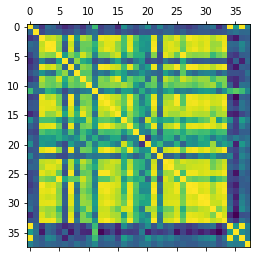

In [26]:
#Create a correlation heatmap using matplotlib

plt.matshow(df_merged_all3.corr())
plt.show()

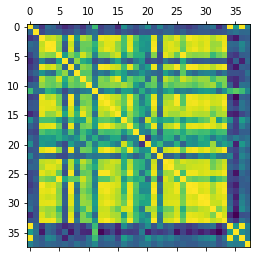

In [27]:
#Save figure
plt.matshow(df_merged_all3.corr())
plt.savefig("out.png") 

In [28]:
#Show current dir
cwd = os.getcwd()
cwd

'C:\\Users\\midov\\Documents\\Studies\\Data Analysis\\Immersion into Data Analytics\\Achievement 6_Advanced Analytics & Dashboard Design\\Causes of Death Analysis\\Scripts'

In [29]:
df_merged_all3.columns

Index(['Unnamed: 0_x', 'Country', 'Year', 'Meningitis',
       'Alzheimer_s_Disease_and_Other_Dementias', 'Parkinson_s_Disease',
       'Nutritional_Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal_Violence', 'Maternal_Disorders', 'HIV_AIDS',
       'Drug_Use_Disorders', 'Tuberculosis', 'Cardiovascular_Diseases',
       'Lower_Respiratory_Infections', 'Neonatal_Disorders',
       'Alcohol_Use_Disorders', 'Self_harm', 'Exposure_to_Forces_of_Nature',
       'Diarrheal_Diseases', 'Environmental_Heat_and_Cold_Exposure',
       'Neoplasms', 'Conflict_and_Terrorism', 'Diabetes_Mellitus',
       'Chronic_Kidney_Disease', 'Poisonings', 'Protein_Energy_Malnutrition',
       'Road_Injuries', 'Chronic_Respiratory_Diseases',
       'Cirrhosis_and_Other_Chronic_Liver_Diseases', 'Digestive_Diseases',
       'Fire_Heat_and_Hot_Substances', 'Acute_Hepatitis', 'Total_no_of_Deaths',
       'Unnamed: 0_y', 'Indicator', 'Unnamed: 0', 'Sex', 'Age Group',
       'Number'],
      dtype='object')

In [30]:
#Create a subset excluding the 'Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0', 'Sex', 'Age Group','Number' and 'Year' columns

subset = df_merged_all3[['Meningitis',
       'Alzheimer_s_Disease_and_Other_Dementias', 'Parkinson_s_Disease',
       'Nutritional_Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal_Violence', 'Maternal_Disorders', 'HIV_AIDS',
       'Drug_Use_Disorders', 'Tuberculosis', 'Cardiovascular_Diseases',
       'Lower_Respiratory_Infections', 'Neonatal_Disorders',
       'Alcohol_Use_Disorders', 'Self_harm', 'Exposure_to_Forces_of_Nature',
       'Diarrheal_Diseases', 'Environmental_Heat_and_Cold_Exposure',
       'Neoplasms', 'Conflict_and_Terrorism', 'Diabetes_Mellitus',
       'Chronic_Kidney_Disease', 'Poisonings', 'Protein_Energy_Malnutrition',
       'Road_Injuries', 'Chronic_Respiratory_Diseases',
       'Cirrhosis_and_Other_Chronic_Liver_Diseases', 'Digestive_Diseases',
       'Fire_Heat_and_Hot_Substances', 'Acute_Hepatitis', 'Total_no_of_Deaths','Country','Indicator']]

Text(0.5, 1.0, 'Correlation Matrix')

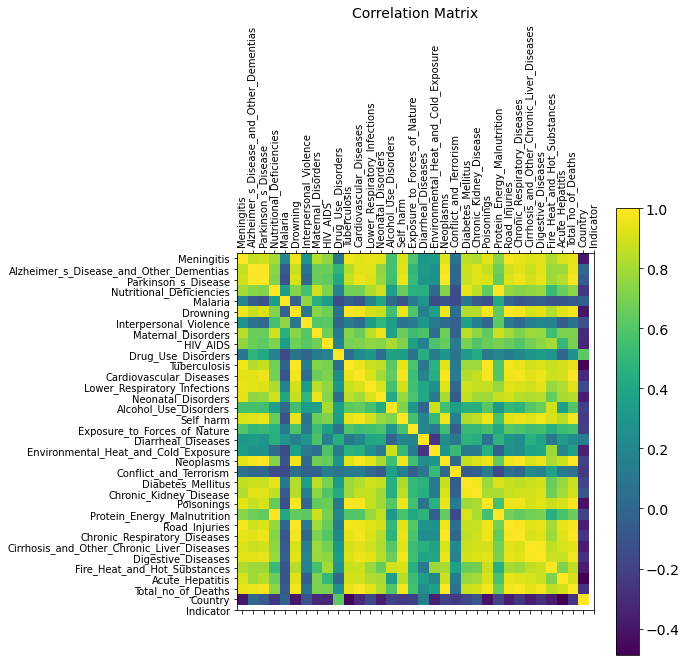

In [31]:
#Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) #figure size 
plt.matshow(subset.corr(), fignum=f.number) #type of plot
plt.xticks(range(subset.shape[1]), subset.columns, fontsize=10, rotation=90) #x axis labels
plt.yticks(range(subset.shape[1]), subset.columns, fontsize=10) #y axis labels
cb = plt.colorbar() #add a colour legend (colorbar)
cb.ax.tick_params(labelsize=14) #add font size
plt.title('Correlation Matrix', fontsize=14) #add title

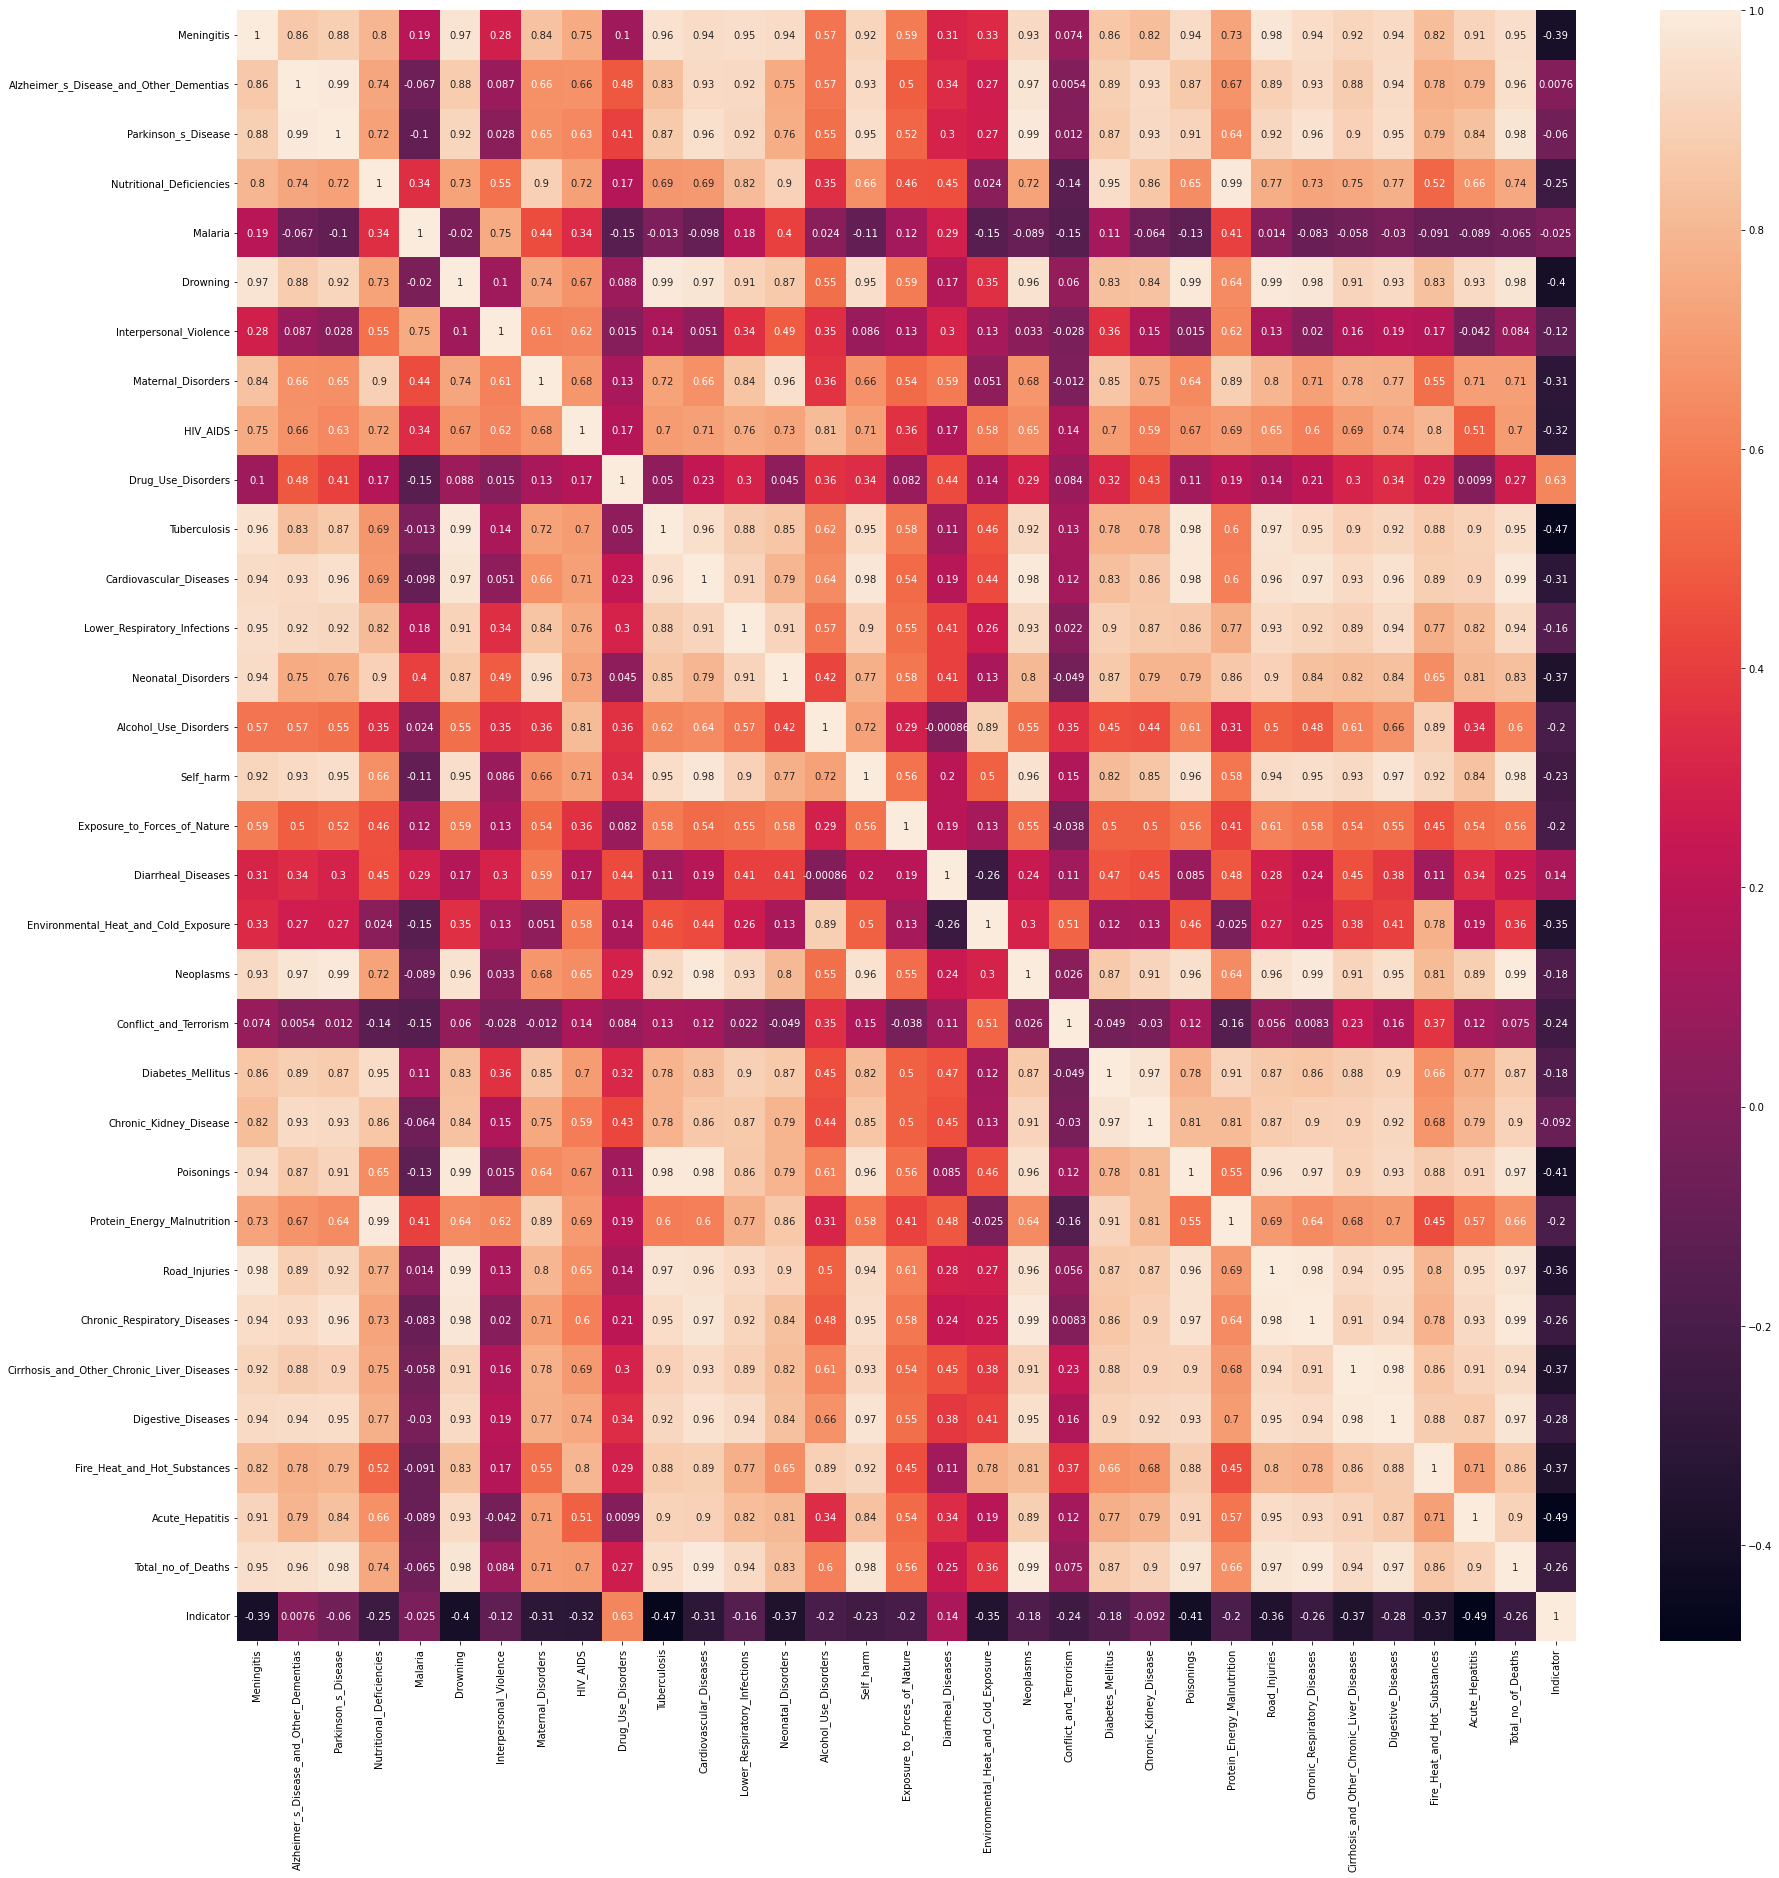

In [32]:
# creating subplot with matplotlib
f,ax = plt.subplots(figsize=(30,30))
# corelation heatmap in seaborn
corr = sns.heatmap(subset.corr(), annot = True, ax = ax)

0: no relationship 0.1–0.3: weak relationship 0.3–0.5: moderate relationship 0.5–1.0: strong relationship


One may trace negative to weak correlation between the health expenditure (as % of GDP) on mortality rate. Meaning, the expenditure of government on health has no or low influences on causes of diseases. There is a strong relationship between the total number of deaths and the causes of deaths. For example, Chronic Respiratory, Digestive, Cardiovascular diseases, etc. have strong correlation with total number of deaths. 
Other examples of strong correlation: Road_injuries and Alzheimer_s_Disease_and_Other_Dementias. If a person is diagnosed with Alzheimer's disease, he/she has is more exposed to road accidents, and hence, he/she has more chances of road injuries.


## Scatterplots

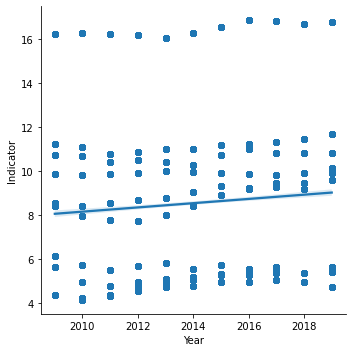

In [33]:
#Create a scatterplot for the "Year" and "Indicator" columns in seaborn
sns.lmplot(x = 'Year', y = 'Indicator', data = df_merged_all3)

There is a moderate positive relationship between Year and Indicator. One can trace a slightly upward trend in current health expedintures.

## Pair Plots

In [34]:
#Keep only the variables to use in the pair plot
subset_2 = df_merged_all3[['Total_no_of_Deaths','Indicator', 'Year','Number']]

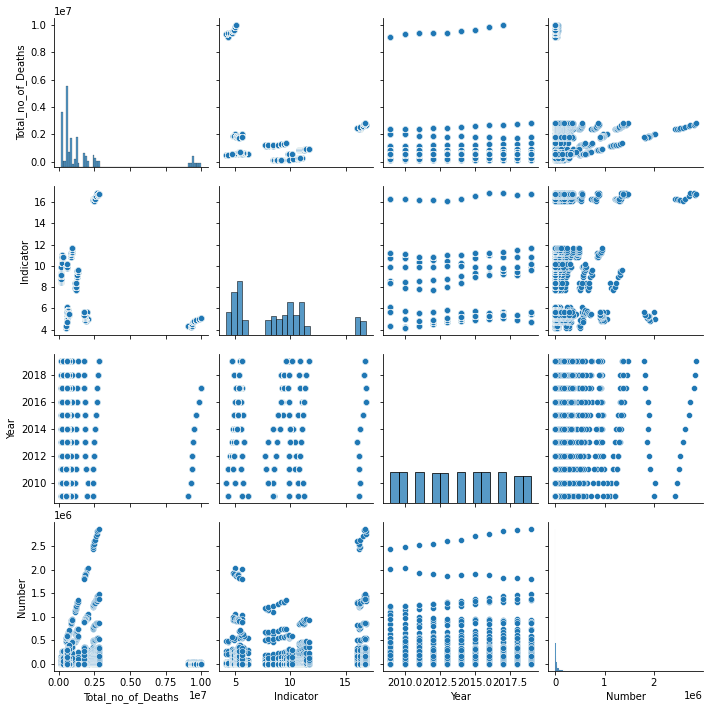

In [35]:
#Create a pair plot 
g = sns.pairplot(subset_2)

No much insights can be extracted here. Almost no change in curent health expedintures in the observed period of time. The number of deaths increases slightly each year. Probably, due to the increase of the population worldwide.

## Categorial Plots

<AxesSubplot:xlabel='Total_no_of_Deaths', ylabel='Count'>

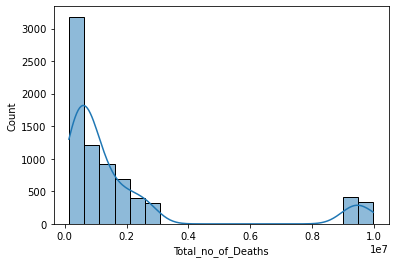

In [36]:
#Use a histogram to visualize the distribution of the variables.
sns.histplot(df_merged_all3['Total_no_of_Deaths'], bins = 20, kde = True)

In [37]:
df_merged_all3.loc[df_merged_all3['Total_no_of_Deaths'] < 1000000, 'Death_indicator'] = 'Low'

In [38]:
df_merged_all3.loc[(df_merged_all3['Total_no_of_Deaths'] >= 1000000) & (df_merged_all3['Total_no_of_Deaths'] < 5000000), 'Death_indicator'] = 'Middle'

In [39]:
df_merged_all3.loc[df_merged_all3['Total_no_of_Deaths'] >= 10000000, 'Death_indicator'] = 'High'

In [40]:
df_merged_all3['Total_no_of_Deaths'].value_counts(dropna = False)

557321     84
9284664    84
1288552    84
1309729    84
2372134    84
           ..
551643     63
529436     63
2834964    63
540252     57
544796     57
Name: Total_no_of_Deaths, Length: 108, dtype: int64

In [41]:
df_merged_all3.columns

Index(['Unnamed: 0_x', 'Country', 'Year', 'Meningitis',
       'Alzheimer_s_Disease_and_Other_Dementias', 'Parkinson_s_Disease',
       'Nutritional_Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal_Violence', 'Maternal_Disorders', 'HIV_AIDS',
       'Drug_Use_Disorders', 'Tuberculosis', 'Cardiovascular_Diseases',
       'Lower_Respiratory_Infections', 'Neonatal_Disorders',
       'Alcohol_Use_Disorders', 'Self_harm', 'Exposure_to_Forces_of_Nature',
       'Diarrheal_Diseases', 'Environmental_Heat_and_Cold_Exposure',
       'Neoplasms', 'Conflict_and_Terrorism', 'Diabetes_Mellitus',
       'Chronic_Kidney_Disease', 'Poisonings', 'Protein_Energy_Malnutrition',
       'Road_Injuries', 'Chronic_Respiratory_Diseases',
       'Cirrhosis_and_Other_Chronic_Liver_Diseases', 'Digestive_Diseases',
       'Fire_Heat_and_Hot_Substances', 'Acute_Hepatitis', 'Total_no_of_Deaths',
       'Unnamed: 0_y', 'Indicator', 'Unnamed: 0', 'Sex', 'Age Group', 'Number',
       'Death_indicator'],
    

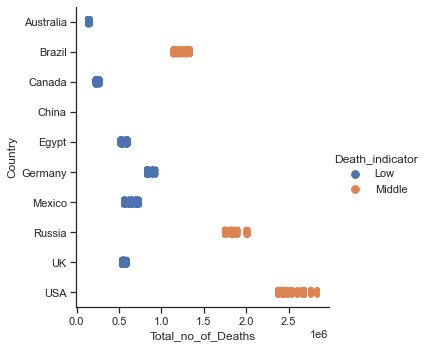

In [42]:
#Create a categorical plot in seaborn using the Death_indicator categories created above
sns.set(style='ticks')
g = sns.catplot(x='Total_no_of_Deaths', y='Country', hue='Death_indicator', data=df_merged_all3)

The highest total number of deaths is in China, followed by USA and Russia due to the size of population in these countries. 

<AxesSubplot:xlabel='Indicator', ylabel='Count'>

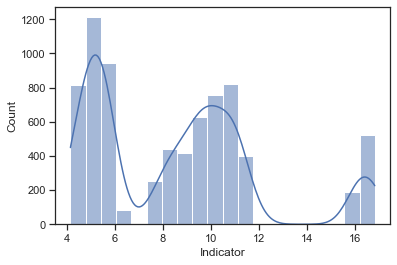

In [43]:
#Use a histogram to visualize the distribution of the variables. 
sns.histplot(df_merged_all3['Indicator'], bins = 20, kde = True)

In [44]:
df_merged_all3.loc[df_merged_all3['Indicator'] < 5, 'Health_expedinture'] = 'Low'

In [45]:
df_merged_all3.loc[(df_merged_all3['Indicator'] >= 5) & (df_merged_all3['Indicator'] < 10), 'Health_expedinture'] = 'Middle'

In [46]:
df_merged_all3.loc[df_merged_all3['Indicator'] >= 11, 'Health_expedinture'] = 'High'

In [47]:
df_merged_all3['Indicator'].value_counts(dropna = False)

5.36     189
5.55     168
4.94     147
4.71     141
11.24    126
        ... 
10.85     63
11.00     63
11.18     63
16.77     63
4.92      57
Name: Indicator, Length: 98, dtype: int64

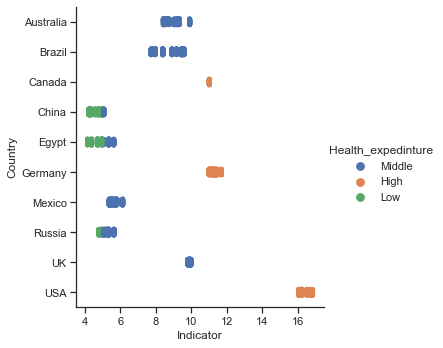

In [48]:
#Create a categorical plot in seaborn using the health_expedinture categories created above
sns.set(style='ticks')
g = sns.catplot(x='Indicator', y='Country', hue='Health_expedinture', data=df_merged_all3)

According to the categorical plot, the highest indicator of current health expedintures is in USA, followed by Germany and Canada

In [49]:
subset_2.head()

,Total_no_of_Deaths,Indicator,Year,Number
0,132086,8.56,2009,140760
1,132086,8.56,2009,1261
2,132086,8.56,2009,230
3,132086,8.56,2009,134
4,132086,8.56,2009,151


In [50]:
#Fig = g.get_figure()
g.savefig("catplot.png") 

In [51]:
#Create a new column for 'Total_no_of_Deaths' for individual Country and Year
df_merged_all3['Total_no_of_Deaths'] = df_merged_all3[cause_of_deaths].sum(axis=1)

In [52]:
#Top 10 Total_no_of_Deaths
top10_Total_no_of_Deaths = df_causes.sort_values(by='Total_no_of_Deaths',ascending=False)[:10][['Total_no_of_Deaths','Country']]
top10_Total_no_of_Deaths

,Total_no_of_Deaths,Country
43,10442561,China
42,10163943,China
41,9978653,China
40,9814213,China
39,9591222,China
38,9503904,China
37,9411928,China
35,9366974,China
36,9364587,China
34,9284664,China


China has the highest deaths due to diseases

In [53]:
#China - "Total_no_of_Deaths" against "Year"
China_Total_no_of_Deaths_df = df_causes[df_causes['Country']=='China'].sort_values (by='Total_no_of_Deaths',ascending=False)

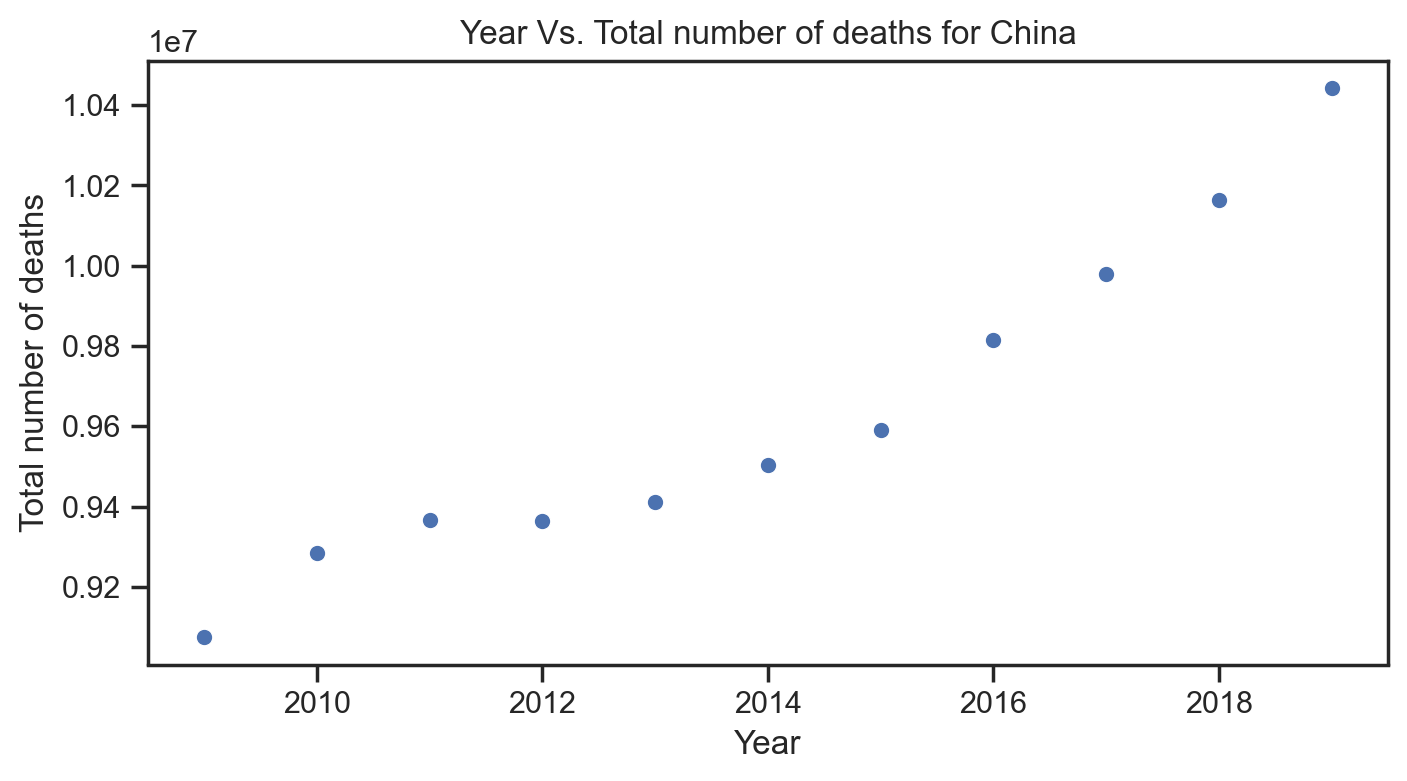

In [54]:
#China - "Total_no_of_Deaths" against "Year"
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=China_Total_no_of_Deaths_df, x='Year', y='Total_no_of_Deaths')
plt.xlabel("Year")
plt.ylabel("Total number of deaths")
plt.title("Year Vs. Total number of deaths for China")
plt.show();

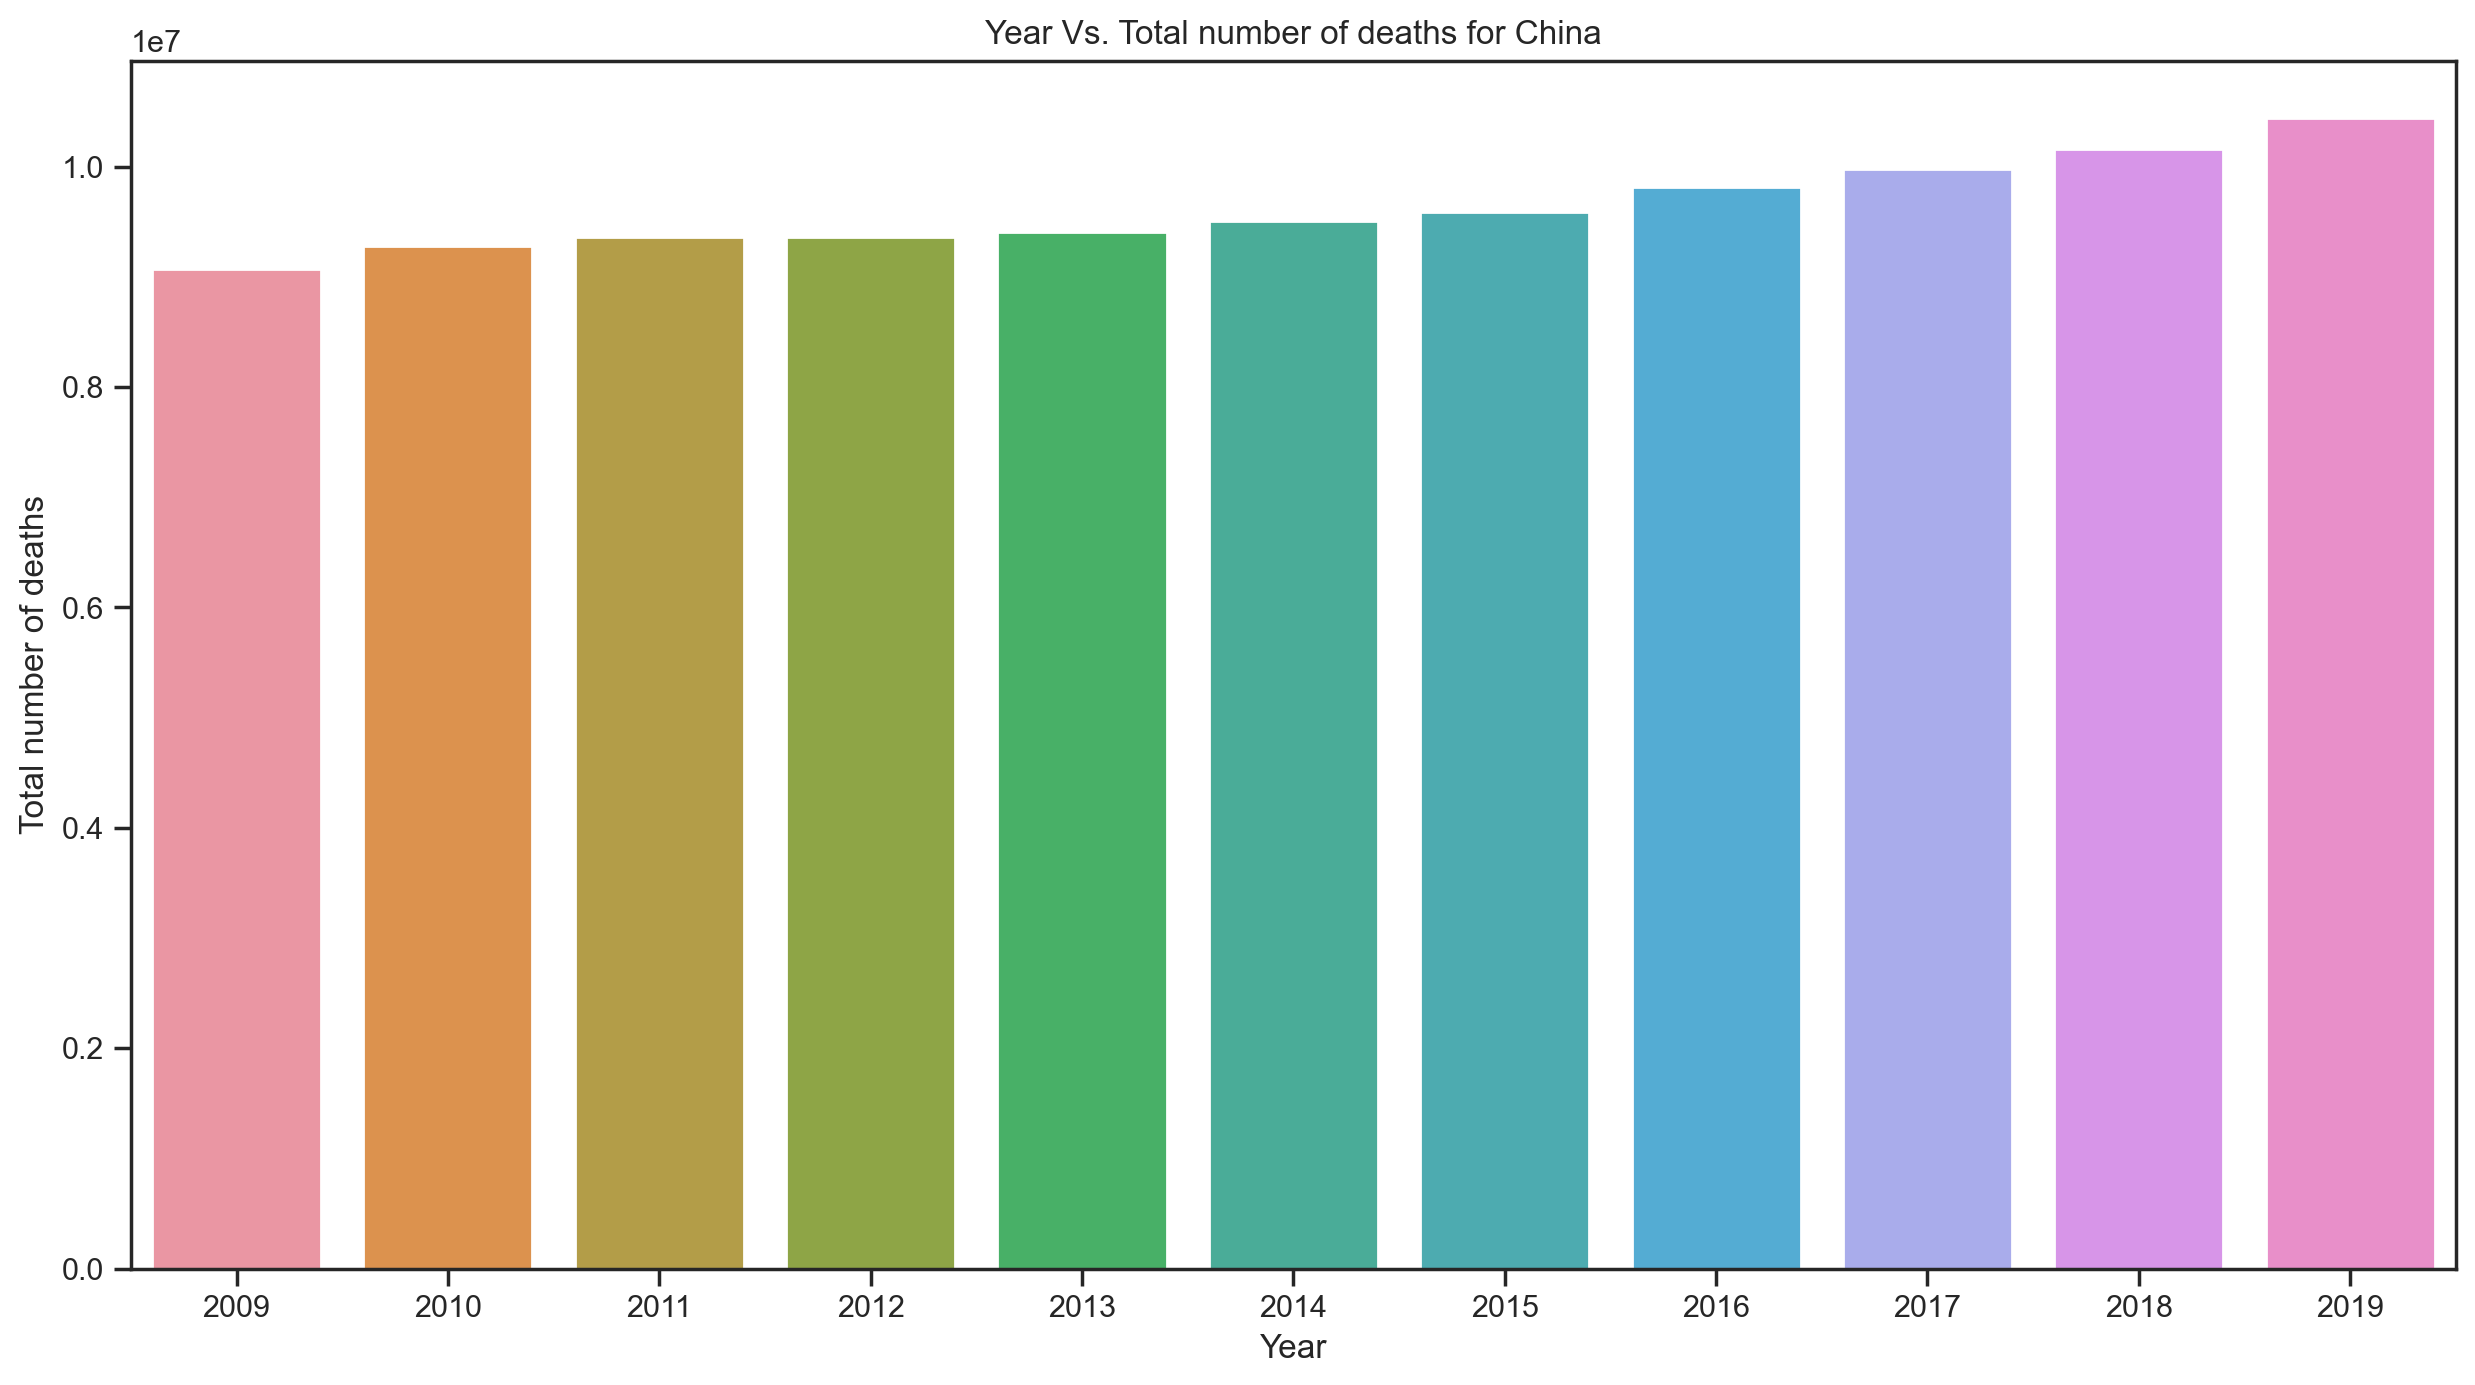

In [55]:
plt.figure(figsize=(15,8),dpi=200)
sns.barplot(data=China_Total_no_of_Deaths_df, x='Year', y='Total_no_of_Deaths')
plt.xlabel("Year")
plt.ylabel("Total number of deaths")
plt.title("Year Vs. Total number of deaths for China")
plt.show();

There is a clear raise in Total Number of Deaths recorded with each year for China.

In [56]:
#Create a subset  of total number of deaths without year indication.
Countries_Total_no_of_Deaths_noyear_df = df_causes.groupby('Country').sum()
Countries_Total_no_of_Deaths_noyear_df.drop('Year',axis=1,inplace=True)

In [57]:
#Create top 3 countries in terms of "Total no.of Deaths" for all years.
Countries_Total_no_of_Deaths_noyear_df.sort_values(by='Total_no_of_Deaths',ascending =False)[:3]

,Unnamed: 0,Meningitis,Alzheimer_s_Disease_and_Other_Dementias,Parkinson_s_Disease,Nutritional_Deficiencies,Malaria,Drowning,Interpersonal_Violence,Maternal_Disorders,HIV_AIDS,...,Chronic_Kidney_Disease,Poisonings,Protein_Energy_Malnutrition,Road_Injuries,Chronic_Respiratory_Diseases,Cirrhosis_and_Other_Chronic_Liver_Diseases,Digestive_Diseases,Fire_Heat_and_Hot_Substances,Acute_Hepatitis,Total_no_of_Deaths
Country,,,,,,,,,,,,,,,,,,,,,
China,4532,84290,2827501,729949,152681,32,697848,165845,29631,256074,...,1939228,323966,116826,3135292,11833964,1690026,3044984,120777,45570,105997482
USA,23529,12440,1449212,311028,57551,0,40630,195503,12162,87300,...,1041654,16816,53634,452661,2208510,682477,1301398,40613,1375,28213750
Russia,18084,16686,451513,98966,4873,0,98337,283667,2997,197974,...,119169,77083,2538,286585,432642,556946,1042867,91972,755,20426939


In [58]:
#China: top 10 causes of deaths
China_10 = Countries_Total_no_of_Deaths_noyear_df.sort_values(by='Total_no_of_Deaths',ascending =False)[:1]

In [59]:
China_10.iloc[0].sort_values(ascending=False)[1:11]

Cardiovascular_Diseases                       45478103
Neoplasms                                     26584743
Chronic_Respiratory_Diseases                  11833964
Road_Injuries                                  3135292
Digestive_Diseases                             3044984
Alzheimer_s_Disease_and_Other_Dementias        2827501
Lower_Respiratory_Infections                   1993562
Chronic_Kidney_Disease                         1939228
Cirrhosis_and_Other_Chronic_Liver_Diseases     1690026
Diabetes_Mellitus                              1623319
Name: China, dtype: int64

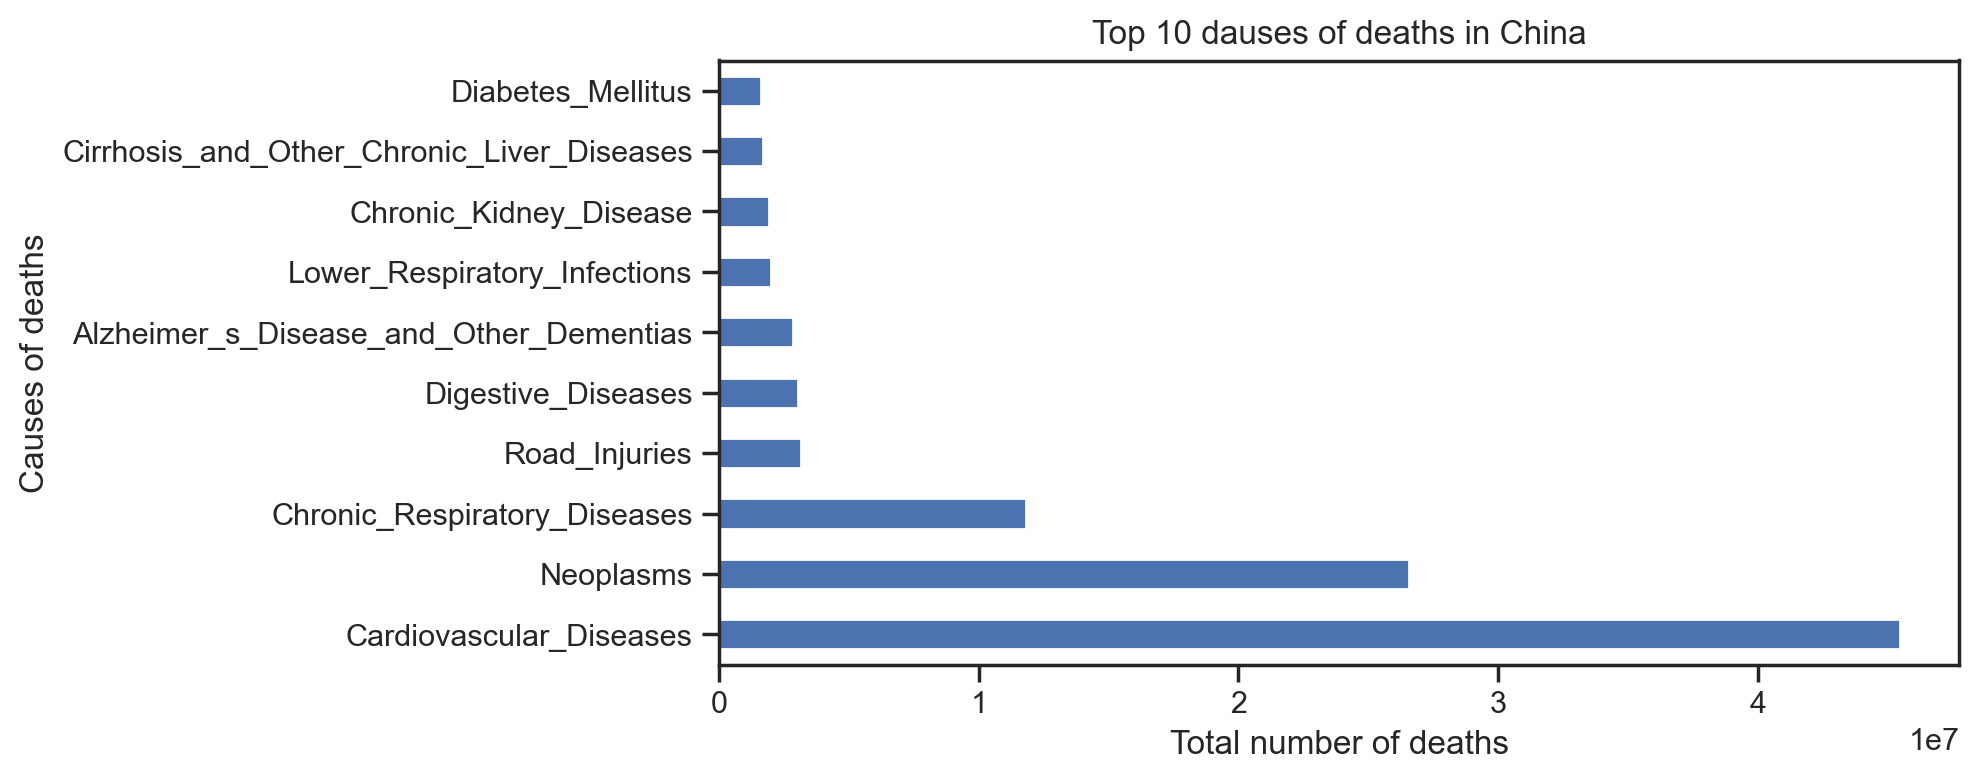

In [60]:
plt.figure(figsize=(8,4),dpi=200)
China_10.iloc[0].sort_values(ascending=False)[1:11].plot(kind='barh')
plt.xlabel("Total number of deaths")
plt.ylabel("Causes of deaths")
plt.title("Top 10 dauses of deaths in China")
plt.show();

## Country specific disease fatality for the span of 10 years 

In [61]:
#Drop the year column
df_no_year = df_merged_all3.drop('Year',axis=1).groupby('Country').sum().reset_index()

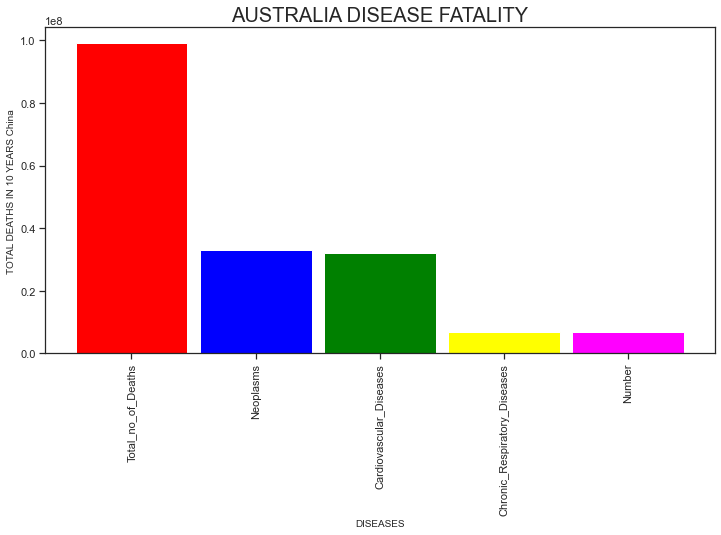

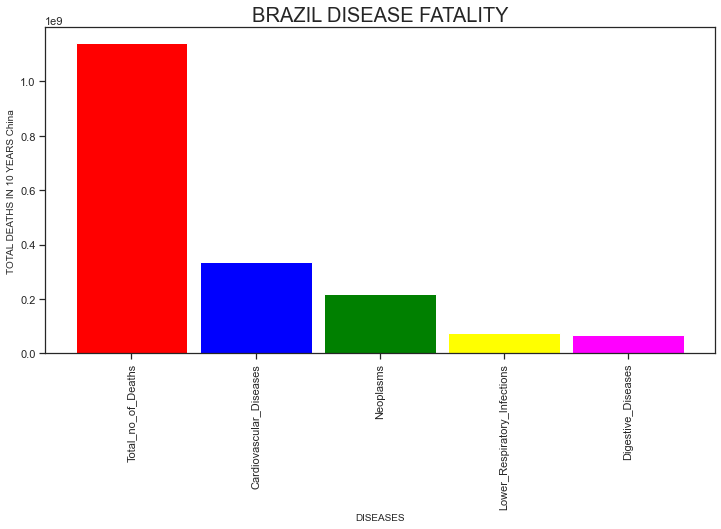

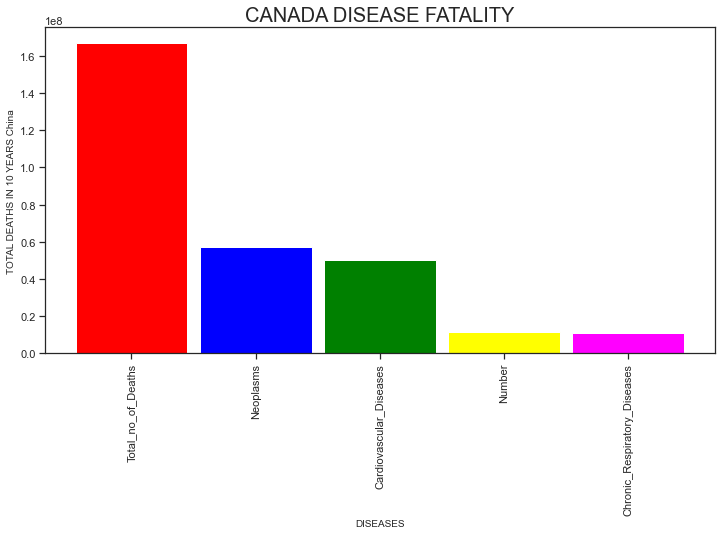

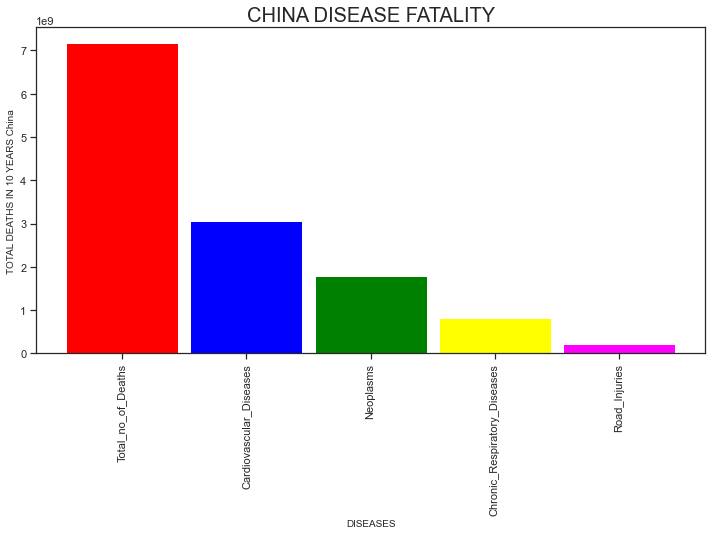

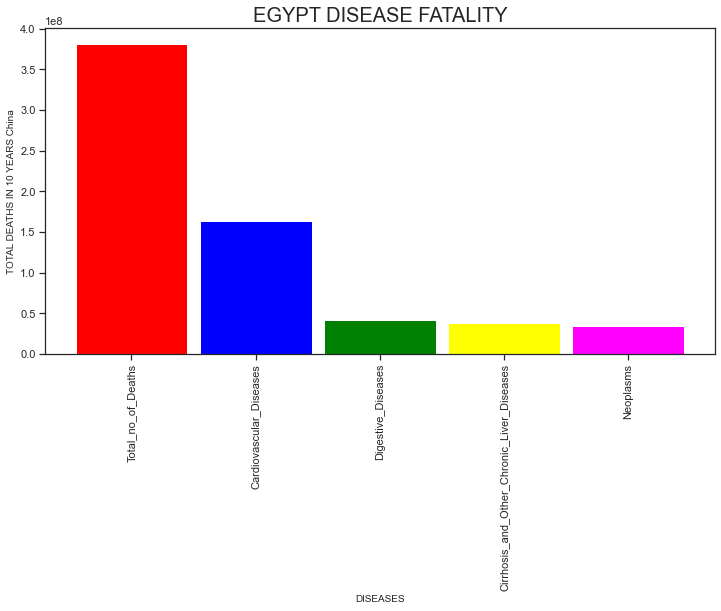

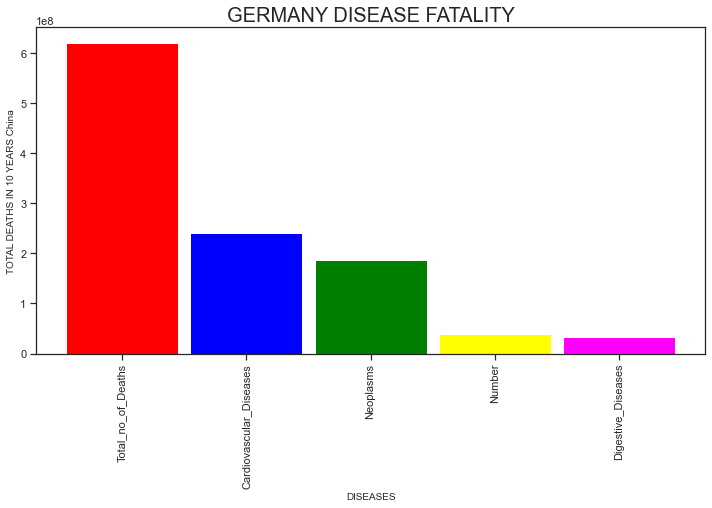

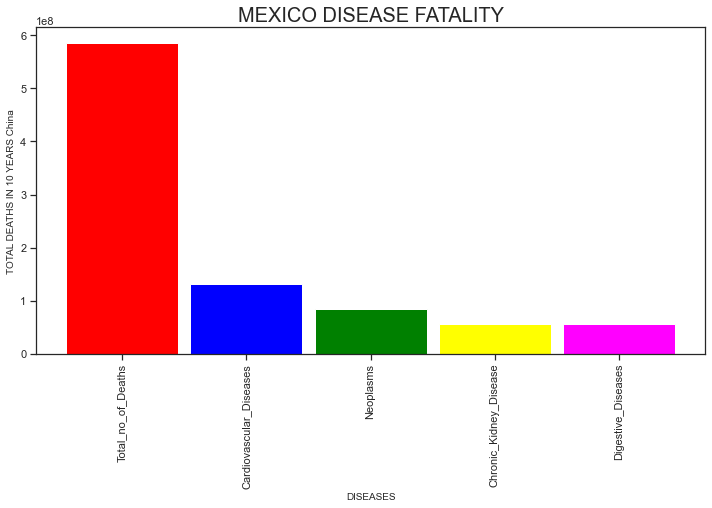

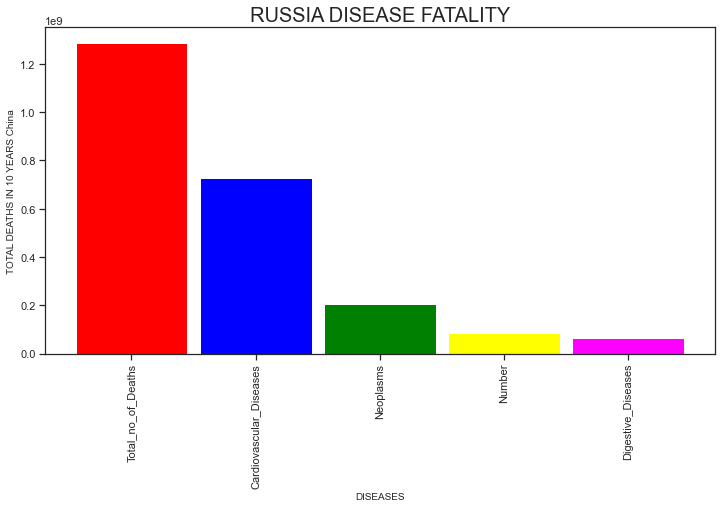

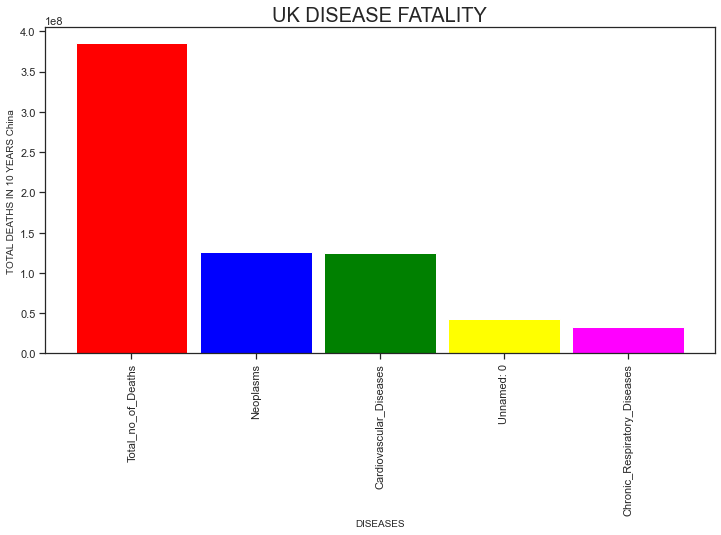

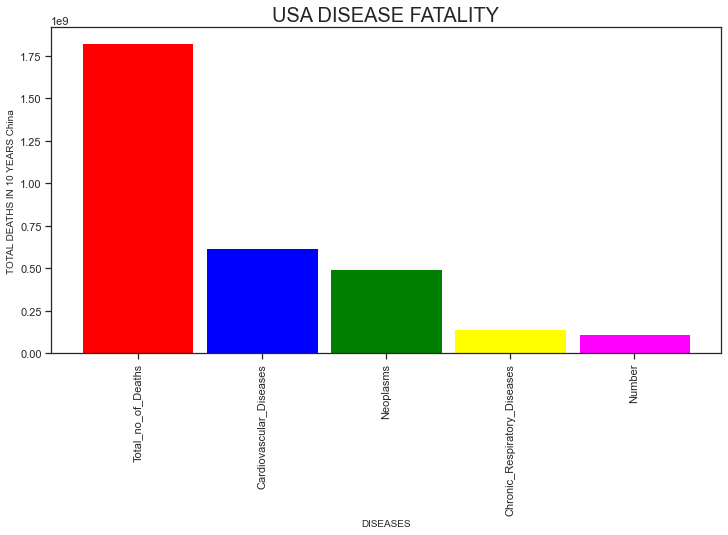

In [62]:
for x in df_no_year.index:
    y=df_no_year.Country.iloc[x]
    temp = df_no_year.set_index('Country').iloc[x].nlargest(5)
    plt.figure(figsize=(12,6))
    plt.bar(data=temp ,x = temp.index , height = temp.values, width=0.9, color = ['red','blue','green', 'yellow', 'magenta'])
    plt.xticks(rotation='vertical')
    plt.xlabel("DISEASES" , size = 10)
    plt.ylabel('TOTAL DEATHS IN 10 YEARS China',size = 10)
    plt.title(y.upper() +' DISEASE FATALITY',size =20)

In [63]:
df_merged_all3['Total_no_of_Deaths']= df_merged_all3.sum(axis=1)

C:\Users\midov\AppData\Local\Temp\ipykernel_35368\2447222176.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_merged_all3['Total_no_of_Deaths']= df_merged_all3.sum(axis=1)


In [64]:
overall = df_no_year[['Country','Total_no_of_Deaths']].sort_values('Total_no_of_Deaths',ascending =False)[:10]

Text(0.5, 1.0, 'OVERALL DISEASE FATALITY ACROSS TOP 10 COUNTRIES')

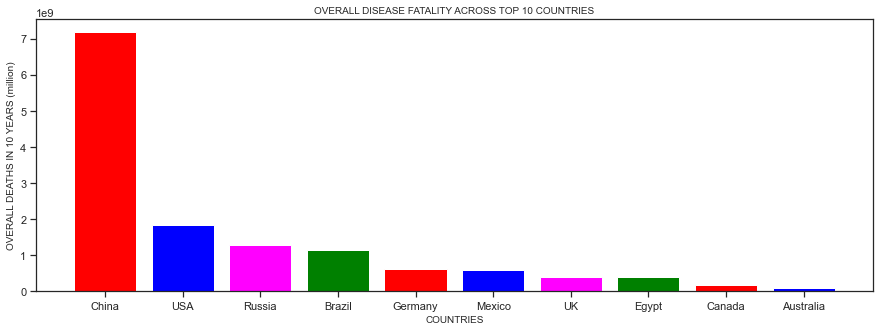

In [65]:
plt.figure(figsize = (15,5))
plt.bar(data=overall , x="Country" , height="Total_no_of_Deaths" , color = ['red','blue', 'magenta', 'green'])
plt.xlabel("COUNTRIES" ,size = 10)
plt.ylabel("OVERALL DEATHS IN 10 YEARS (million)" , size =10)
plt.title("OVERALL DISEASE FATALITY ACROSS TOP 10 COUNTRIES",size=10)

## 04. Questions and Answers

What are the top deadly causes/diseases in the world? - Chronic Respiratory diseases, followed by Cardiovascular and Digestive diseases.

What countries facing overall highest deaths due to diseases? - China, followed by USA and Russia.

Disease specific country mortality for 10 years? - Represented in bar charts for each country above. 

Country specific disease fatality for the span of 10 years - In China it's Neoplasms followed by Cardiovascular diseases.

The influence of health expenditure (as % of GDP) on mortality rate - Low to none, meaning, the expenditure of government on health has no or low influences on causes of diseases.

What gender has the highest numbers of death and due to what? - Here, pair plot is not informative, other methods of investigation needed.

## 05. Hypothesis

The more number of deaths for a particular disease (Chronic Respiratory, Digestive, Cardiovascular diseases),
the more total number of deaths in the country.

The more number of Alzheimer's Disease and Other Dementias, the more chances of road injuries.

The more number of Chronic Respiratory diseases, the closer a country to the top of the list with the top deadly causes in the world.

## 06. Export Data

In [68]:
df_merged_all3.to_csv(os.path.join(path,'Data','Prepared Data','df_merged_all3.csv'))